In [100]:
%matplotlib inline

In [101]:
from matplotlib import pyplot as plt

In [206]:
from sympy import *
from sympy.matrices.dense import hessian
from numpy import linspace, ones, ones_like, where, logical_and, zeros

In [6]:
init_printing()

In [38]:
var(" a b c X sigma")
params = a,b,c

In [77]:
def expectation_of_hessian_of_log_likelihood_sum_ith_element(mu):
    theta = list(mu.atoms())
    try:
        theta.remove(X)
    except:
        theta.remove(I)
    theta = [p for p in params if p in theta]
    print(theta)
    return -1/2/sigma * (hessian(mu**2, theta) - 2*mu*hessian(mu, theta))

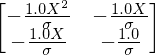

In [40]:
lin_expect = expectation_of_hessian_of_log_likelihood_sum_ith_element(a*X+b)
lin_expect

In [41]:
lin_expect_func = lambdify((a, b, sigma, X), lin_expect)
lin_expect_func(1,2, ones(1001), linspace(0, 1, 1001)).sum(axis=-1)

array([[ -333.8335,  -500.5   ],
       [ -500.5   , -1001.    ]])

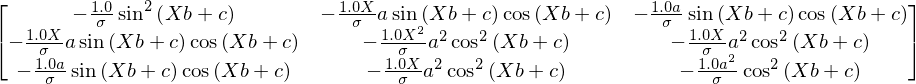

In [42]:
sin_expect = expectation_of_hessian_of_log_likelihood_sum_ith_element(a*sin(b*X+c))
sin_expect

In [45]:
sin_expect_func = lambdify((a, b, c, sigma, X), sin_expect)
sin_expect_func(3,10,1, ones(1001), linspace(0, 1, 1001)).sum(axis=-1)

array([[ -523.80698019,   -71.54475105,   -44.45992428],
       [  -71.54475105, -1476.54240868, -2241.44048362],
       [  -44.45992428, -2241.44048362, -4294.73717829]])

[a, b, c]


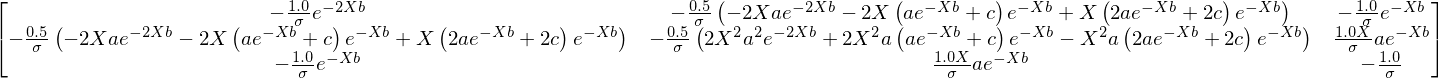

In [53]:
expect = expectation_of_hessian_of_log_likelihood_sum_ith_element(a*exp(-b*X)+c)
expect

In [54]:
expect_func = lambdify((a, b, c, sigma, X), expect)
expect_func(3,10,1, ones(1001), linspace(0, 1, 1001)).sum(axis=-1)

array([[  -50.50166655,     7.49974968,  -100.496316  ],
       [    7.49974968,    -2.24999898,    29.98483602],
       [ -100.496316  ,    29.98483602, -1001.        ]])

## Трансмон

In [316]:
var("I f_c g Pi I_ss f_qmax d")
params = (f_c, g, Pi, I_ss, f_qmax, d)
Is = linspace(0, 1, 200)
sigmas = ones_like(Is)
freq_window = 0.02

In [317]:
def transmon_spectrum():
    phi = (I-I_ss)/Pi
    return f_qmax*sqrt(sqrt(cos(pi*phi)**2)*sqrt(1+d**2*tan(pi*phi)**2))

def f_plus():
    f_q = transmon_spectrum()
    E0 = (f_c - f_q) / 2
    E2 = f_c + 1 / 2 * sqrt(4 * g ** 2 + (f_q - f_c) ** 2)
    return E2 - E0

def f_minus():
    f_q = transmon_spectrum()
    E0 = (f_c - f_q) / 2
    E1 = f_c - 1 / 2 * sqrt(4 * g ** 2 + (f_q - f_c) ** 2)
    return E1 - E0

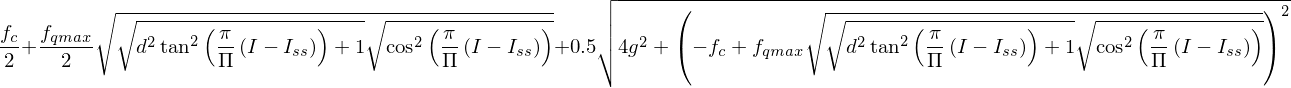

In [318]:
f_plus()

In [319]:
expect = expectation_of_hessian_of_log_likelihood_sum_ith_element(f_plus())

[f_c, g, Pi, I_ss, f_qmax, d]


In [320]:
expect_func = lambdify((f_c, g, Pi, I_ss, f_qmax, d, sigma, I), expect)

In [321]:
f_plus_vals = expect_func(6, 0.05, 0.7, 0.4, 7, 0.5, sigmas, Is)

In [322]:
expect = expectation_of_hessian_of_log_likelihood_sum_ith_element(f_minus())

[f_c, g, Pi, I_ss, f_qmax, d]


In [323]:
expect_func = lambdify((f_c, g, Pi, I_ss, f_qmax, d, sigma, I), expect)

In [324]:
f_minus_vals = expect_func(6, 0.05, 0.7, 0.4, 7, 0.5, sigmas, Is)

In [325]:
f_plus_func = lambdify((f_c, g, Pi, I_ss, f_qmax, d, I), f_plus())
f_minus_func = lambdify((f_c, g, Pi, I_ss, f_qmax, d, I), f_minus())

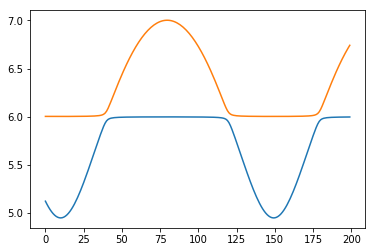

In [326]:
plt.plot(f_minus_func(6, 0.05, 0.7, 0.4, 7, 0.5, Is))
plt.plot(f_plus_func(6, 0.05, 0.7, 0.4, 7, 0.5, Is))

In [327]:
def find_places_for_f_plus_and_minus(Is, f_c, g, Pi, I_ss, f_qmax, d):
    
    f_plus_vals = f_plus_func(f_c, g, Pi, I_ss, f_qmax, d, Is)
    f_minus_vals = f_minus_func(f_c, g, Pi, I_ss, f_qmax, d, Is)

    upper_limit = f_c + freq_window
    lower_limit = f_c - freq_window

    res_freqs_model = ones_like(X)*f_c
    idcs1 = where(logical_and(lower_limit < f_minus_vals ,
                              f_minus_vals < upper_limit))
    idcs2 = where(logical_and(lower_limit < f_plus_vals,
                              f_plus_vals < upper_limit))

    
    return idcs1[0], idcs2[0]

In [328]:
M, P = find_places_for_f_plus_and_minus(Is, 6, 0.05, 0.7, 0.4, 7, 0.5)

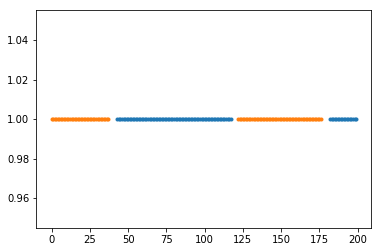

In [329]:
plt.plot(M, ones_like(M), ".")
plt.plot(P, ones_like(P), ".")

In [330]:
hess_expect_list = zeros((6, 6,len(Is)))
hess_expect_list[:, :, M] = f_minus_vals[:,:,M]
hess_expect_list[:, :, P] = f_plus_vals[:,:,P]

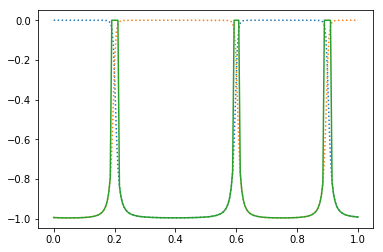

In [331]:
plt.plot(Is, f_minus_vals[0, 0,:], ":")
plt.plot(Is, f_plus_vals[0, 0,:], ":")

plt.plot(Is, hess_expect_list[0,0,:])

In [227]:
import numpy

In [228]:
numpy.set_printoptions(precision=4, linewidth=150)

In [332]:
hess_expect_list.sum(axis=-1)

array([[-1.8106e+02,  1.1768e+00,  4.8924e-01,  4.8388e+00, -2.0657e+00, -4.3246e+00],
       [ 1.1768e+00, -9.6204e+00, -4.0825e-01,  3.9220e-01,  4.9027e-02, -4.7149e-01],
       [ 4.8924e-01, -4.0825e-01, -2.0366e+00, -2.3898e+00, -7.1958e-03, -3.6772e-02],
       [ 4.8388e+00,  3.9220e-01, -2.3898e+00, -1.0092e+01,  1.2731e-01,  2.8128e-01],
       [-2.0657e+00,  4.9027e-02, -7.1958e-03,  1.2731e-01, -9.2824e-02, -1.8455e-01],
       [-4.3246e+00, -4.7149e-01, -3.6772e-02,  2.8128e-01, -1.8455e-01, -4.0115e-01]])

In [333]:
from SymbolicHessian import *
from functools import partial

In [336]:
FM = FisherMatrix(I, (f_minus(), f_plus()), params)

Calculating the Hessian for an N-branch function


array([[ 1.8106e+02, -1.1768e+00, -4.8924e-01, -4.8388e+00,  2.0657e+00,  4.3246e+00],
       [-1.1768e+00,  9.6204e+00,  4.0825e-01, -3.9220e-01, -4.9027e-02,  4.7149e-01],
       [-4.8924e-01,  4.0825e-01,  2.0366e+00,  2.3898e+00,  7.1958e-03,  3.6772e-02],
       [-4.8388e+00, -3.9220e-01,  2.3898e+00,  1.0092e+01, -1.2731e-01, -2.8128e-01],
       [ 2.0657e+00, -4.9027e-02,  7.1958e-03, -1.2731e-01,  9.2824e-02,  1.8455e-01],
       [ 4.3246e+00,  4.7149e-01,  3.6772e-02, -2.8128e-01,  1.8455e-01,  4.0115e-01]])

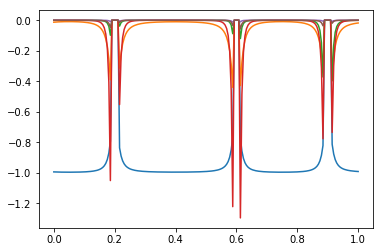

In [337]:
FM.calculate_numeric(Is, (6, 0.05, 0.7, 0.4, 7, 0.5), ones_like(Is), 
                     partial(FM.example_mu_chooser_for_anticrossings, freq_window=freq_window))